In [1]:
import pandas as pd

In [2]:
consistency = pd.read_csv('consistency_last_three.csv')

In [4]:
last_season = pd.read_csv('2022-23.csv')
season_prior = pd.read_csv('2021-22.csv')
two_years_ago = pd.read_csv('2020-21.csv')

In [6]:
last_three = pd.concat([last_season, season_prior, two_years_ago], axis=0)

In [7]:
tage_thompson = last_three.loc[last_three['name'] == 'Tage Thompson']

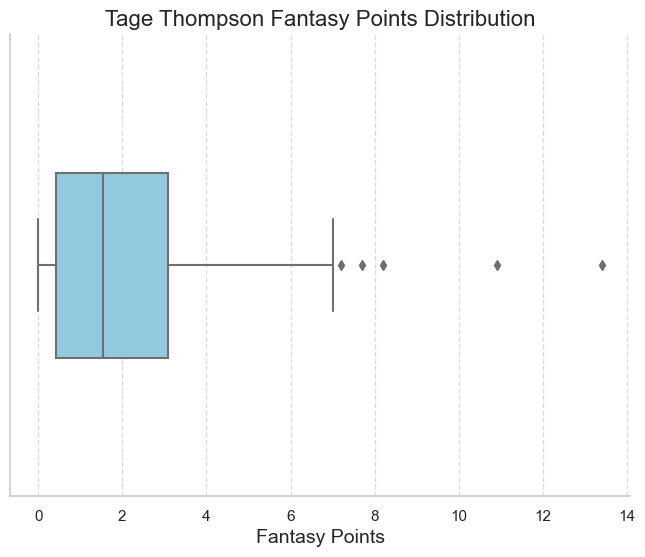

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(8, 6))

sns.boxplot(x=tage_thompson['fantasyPoints'], color='skyblue', width=0.4, linewidth=1.5)

plt.xlabel('Fantasy Points', fontsize=14)
plt.title('Tage Thompson Fantasy Points Distribution', fontsize=16)

ax.set_yticklabels([]) 

plt.grid(axis='x', linestyle='--', alpha=0.7)

sns.despine()

plt.show()

In [23]:
consistency = pd.read_csv('consistency_last_three.csv')

In [24]:
consistency = consistency.loc[consistency['gp'] > 100]
consistency = consistency.sort_values('coeffvar')
consistency = consistency.reset_index(drop=True)
consistency['coeffvar'] = round(consistency['coeffvar'] * 100, 1)
consistency['mean'] = round(consistency['mean'], 2)
consistency['num_outliers'] = 0

import ast
for index, row in consistency.iterrows():
    games = consistency['outliers'][index]
    consistency['num_outliers'][index] = len(ast.literal_eval(games))
    
consistency.head()

C:\Users\seana\AppData\Local\Temp\ipykernel_32524\1128948324.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  consistency['num_outliers'][index] = len(ast.literal_eval(games))


,Unnamed: 0,name,position,gp,std,mean,coeffvar,variance,outliers,num_outliers
0,591,Moritz Seider,D,164,1.206282,2.24,53.8,1.455116,"[5.7, 7.0, 6.3, 5.5]",4
1,192,Andrew Peeke,D,173,0.912296,1.66,54.9,0.832283,"[4.9, 4.5]",2
2,343,Darnell Nurse,D,209,1.215098,2.21,55.1,1.476463,[6.4],1
3,62,Brayden McNabb,D,192,1.008340,1.79,56.3,1.016750,"[4.5, 5.3]",2
4,626,Colton Parayko,D,191,0.992546,1.74,57.2,0.985147,"[4.8, 4.9]",2


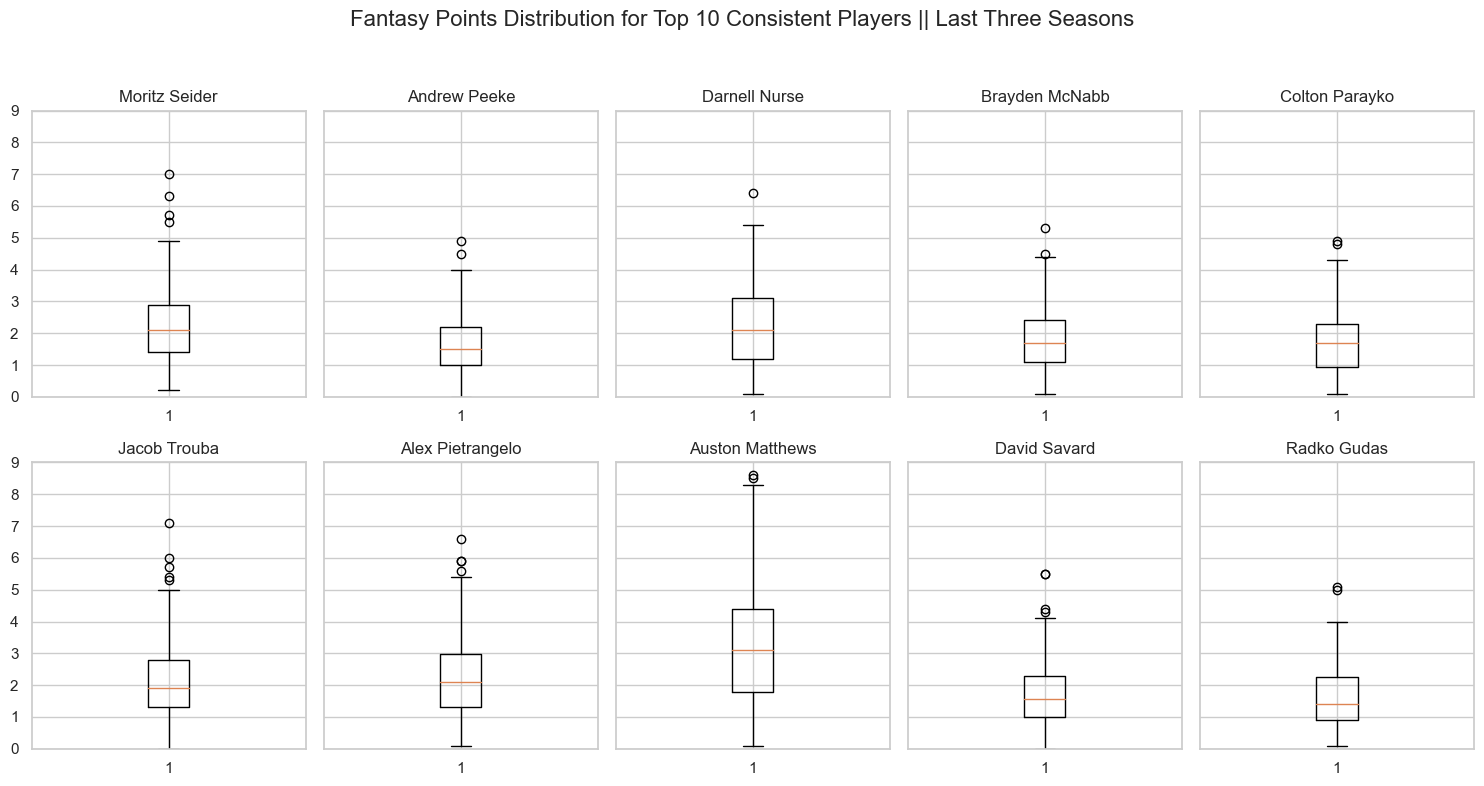

In [51]:
top10 = consistency.head(10)
names = top10['name']

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 8), sharey=True)

axes = axes.flatten()

for i, name in enumerate(names):
    data = last_three.loc[last_three['name'] == name]
    x = data['fantasyPoints']

    axes[i].boxplot(x)
    axes[i].set_title(name) 

    axes[i].set_xlabel('')

    axes[i].set_ylim(0, 9)


fig.suptitle('Fantasy Points Distribution for Top 10 Consistent Players || Last Three Seasons', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95])


plt.show()
